# INSE 6630 Recent Developments in Information Systems Security - Group Project

---
Group Members:
- Rakshith Raj Gurupura Puttaraju  - 40235325
- Rahul Ravi Hulli - 40234542
- Mustafa Talha Ucar  - 40059335
- Anita Francis Archibong - 27729790
- Josephine Famiyeh - 40262544
---

This notebook is created for a team project in the INSE 6630 Recent Developments in Information Systems Security course at Concordia University, Montreal, Canada, in the fall semester of 2023. The purpose of the project is to analyze and compare a variety of machine learning techniques for their capability in detecting network intrusions, employing the KDD Cup'99 dataset for this analysis.

---

This notebook focuses on implementing classification using the Naive Bayes algorithm

# Naive Bayes

In [1]:
# Importing libraries for data analysis and visualization
import numpy as np               # NumPy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for plotting
import pandas as pd              # Pandas for data manipulation
import seaborn as sns            # Seaborn for statistical data visualization

## Loading the datasets

The dataset has already been processed and split in the preprocessing notebook.

In [2]:
# Mount Google Drive in Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading training and testing datasets

# Load training data
X_train = pd.read_csv("drive/MyDrive/Data/kdd99_training_data.csv")

# Load testing data
X_test = pd.read_csv("drive/MyDrive/Data/kdd99_testing_data.csv")

# Load training labels
y_train = pd.read_csv("drive/MyDrive/Data/kdd99_training_labels.csv")

# Load testing labels
y_test = pd.read_csv("drive/MyDrive/Data/kdd99_testing_labels.csv")

In [ ]:
# Print shape information and label details for training and testing datasets
print(f"Shape of training dataset: {X_train.shape}")  # Display the shape of the training features dataset

print(f"Shape of testing dataset: {X_test.shape}")    # Display the shape of the testing features dataset

print(f"Labels for training dataset: {y_train.shape}") # Display the shape of the training labels

print(f"Labels for testing dataset: {y_test.shape}")   # Display the shape of the testing labels


Shape of training dataset: (370515, 31)
Shape of testing dataset: (123505, 31)
Labels for training dataset: (370515, 1)
Labels for testing dataset: (123505, 1)


In [ ]:
# Extracting the 'label' column from the training (y_train)
y_train = y_train['label']
# And testing (y_test) datasets
y_test = y_test['label']

In [ ]:
# Print the unique labels in the training data
print(f"Labels: {y_train.unique()}")

Labels: ['normal' 'dos' 'r2l' 'probe' 'u2r']


## Scaling

To use the Naive Bayes algorithm, we will scale the training and testing dataset using a `MinMaxScaler`.

In [ ]:

# Feature Scaling using Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale the training features
X_train = scaler.fit_transform(X_train)

# Scale the testing features using the same scaler fitted on the training data
X_test = scaler.transform(X_test)

## Model Training

In [ ]:
# Training a Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes model
model = GaussianNB()

# Train the model using the scaled training features and corresponding labels
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Evaluate the performance of the trained model
print(f"The training score: {model.score(X_train, y_train)}")  # Print the accuracy on the training data
print(f"The testing score: {model.score(X_test, y_test)}")      # Print the accuracy on the testing data

The training score: 0.9240813462342955
The testing score: 0.9234848791546901


In [ ]:
# Make predictions on the testing dataset using the trained model
y_predicted = model.predict(X_test)

## Model Evaluation

In [ ]:
# Evaluate the model using confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_predicted)

# Generate a classification report
report = classification_report(y_test, y_predicted)

# Print the classification report
print(report)

              precision    recall  f1-score   support

         dos       0.98      0.98      0.98     97676
      normal       0.97      0.69      0.81     24482
       probe       0.15      0.99      0.26      1056
         r2l       0.42      0.44      0.43       279
         u2r       0.02      0.83      0.03        12

    accuracy                           0.92    123505
   macro avg       0.51      0.79      0.50    123505
weighted avg       0.97      0.92      0.94    123505



In [ ]:
# Build annotations for confusion matrix
y_labels = ['dos', 'normal', 'probe', 'r2l', 'u2r']
labels = []

# Iterate through the real and predicted labels to create annotations
for i in range(5):
    for j in range(5):
        labels.append(str(f"Real {y_labels[i]}\nPredicted {y_labels[j]}\n{conf_matrix[i, j]}"))

# Reshape the list into a 5x5 array for display
labels = np.asarray(labels).reshape(5, 5)

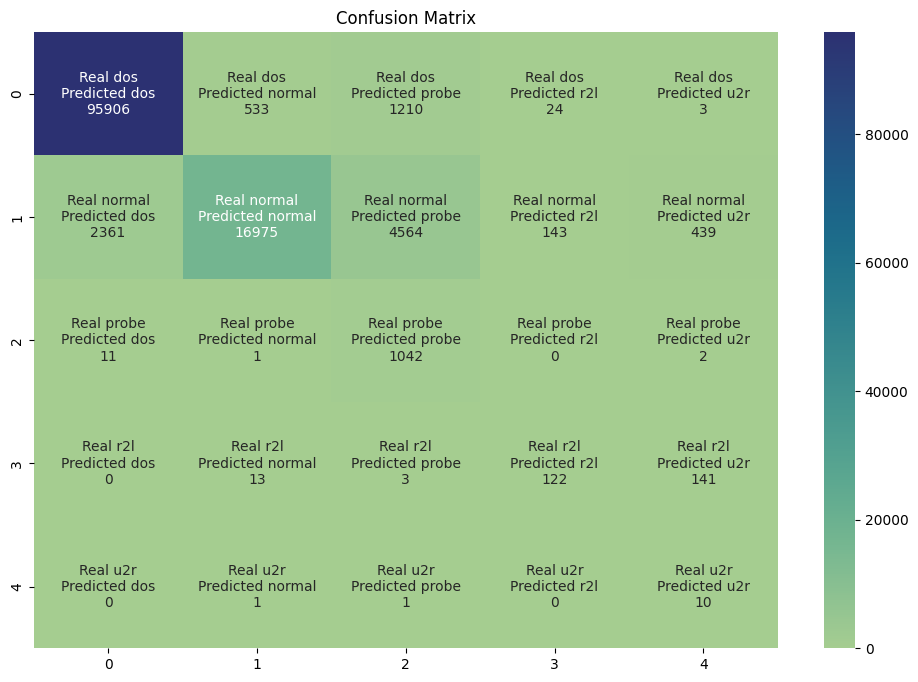

In [ ]:
# Confusion matrix visualization
plt.figure(figsize=(12, 8))
plt.title("Confusion Matrix")

# Create a heatmap with annotations using Seaborn
sns.heatmap(conf_matrix, annot=labels, cmap='crest', fmt='')

# Display the plot
plt.show()

**Reminder on label proportions:**

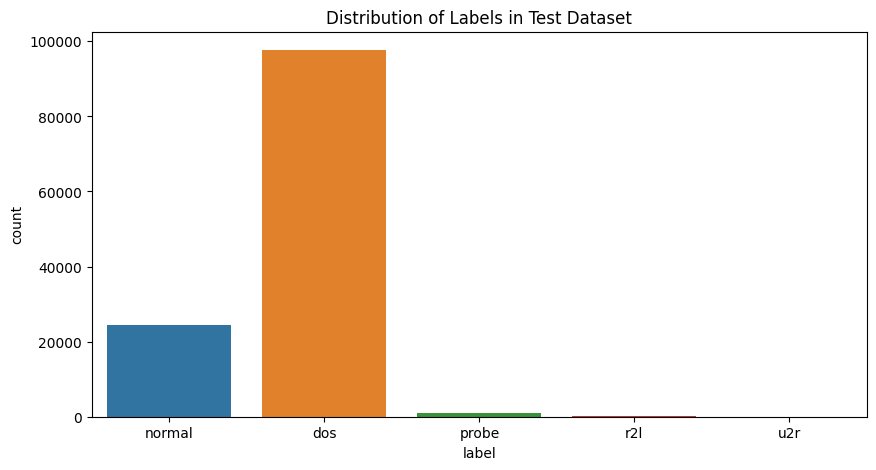

dos       0.790867
normal    0.198227
probe     0.008550
r2l       0.002259
u2r       0.000097
Name: label, dtype: float64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test is defined and represents the true labels for a test dataset.

# Convert y_test to a categorical series with string type for better visualization.
# This is particularly useful when the labels are not inherently categorical.
y_test = pd.Series(y_test).astype(str)

# Visualize the distribution of labels in y_test using a countplot.
plt.figure(figsize=(10, 5))  # You can adjust the figure size as needed
plt.title("Distribution of Labels in Test Dataset")
sns.countplot(x=y_test)
plt.show()

# Print out the relative proportions of each label to provide insights into the label distribution.
label_proportions = y_test.value_counts(normalize=True)
print(label_proportions)

### Conclusion

###  Analysis of Naive Bayes Classifier for Network Intrusion Detection:

###  Overall Model Performance:
###  The Naive Bayes model demonstrates a commendable accuracy of approximately 92-93% on both the training and testing datasets.

###  Label-Specific Observations:
###  - DOS Attack: Excellent results across all metrics, which align with its significant representation (around 80% of all rows).
###  - Normal: Good precision but a lower recall, indicating potential misclassifications of normal entries as attacks.
###  - Probe: High recall but low precision, suggesting a tendency to classify other labels as probes.
###  - R2L: Low precision and recall, indicating challenges in accurately identifying this type of attack.
###  - U2R: Very low precision (2%) but a good recall (83%), highlighting the difficulty in correctly identifying this rare attack.

###  Consideration for Cybersecurity Applications:
###  - Recall is deemed crucial for network intrusion detection, especially for U2R, R2L, and Probe attacks.
###  - The model's performance should be assessed in the context of its application (IPS vs. IDS).
###  - If used for blocking traffic (IPS), both recall on attacks and precision on normal entries are important.
###  - Imbalance in label support significantly impacts precision for less frequent labels.

###  Recommendations:
###  - Emphasize model improvements in identifying rare attacks (U2R, R2L).
###  - Consider tuning the model parameters or exploring alternative algorithms to enhance overall performance.
### - Continuous monitoring and updates are essential to adapt to evolving cybersecurity threats.
